In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [132]:
df= pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df[['Age']]=imputer.fit_transform(df[['Age']])

In [134]:
df = df.sample(50)

In [39]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')# mode for categorical values
df[['Cabin','Embarked']]=imputer.fit_transform(df[['Cabin','Embarked']])

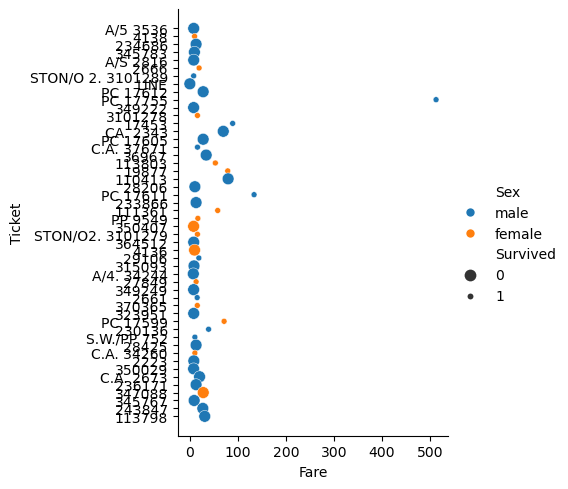

In [57]:
sns.relplot(data=df,x='Fare',y='Ticket',kind='scatter',hue='Sex',size='Survived')

<Axes: xlabel='PassengerId', ylabel='Fare'>

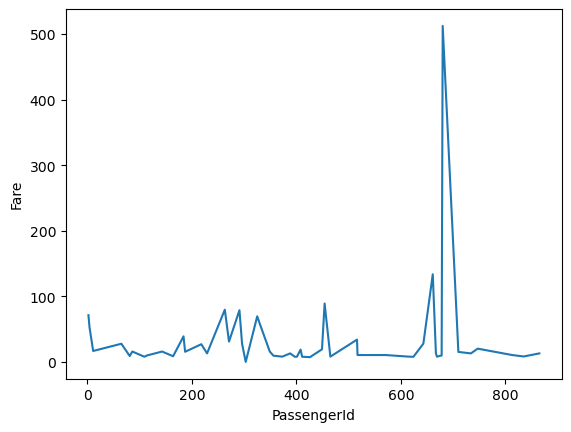

In [63]:
sns.lineplot(data=df,x='PassengerId',y='Fare')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 668 to 270
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  50 non-null     int64  
 1   Survived     50 non-null     int64  
 2   Pclass       50 non-null     int64  
 3   Name         50 non-null     object 
 4   Sex          50 non-null     object 
 5   Age          50 non-null     float64
 6   SibSp        50 non-null     int64  
 7   Parch        50 non-null     int64  
 8   Ticket       50 non-null     object 
 9   Fare         50 non-null     float64
 10  Cabin        50 non-null     object 
 11  Embarked     50 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.1+ KB


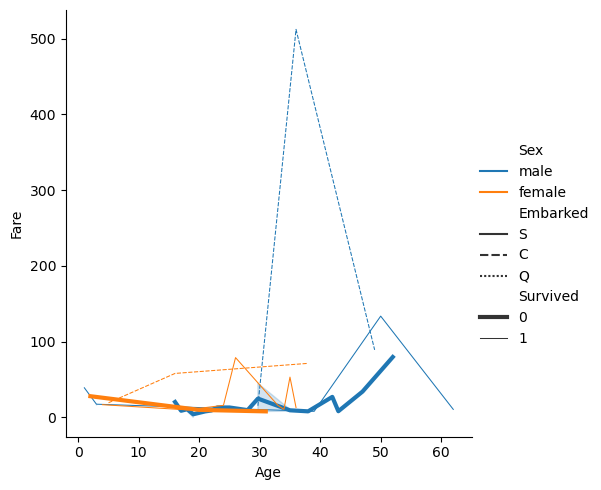

In [79]:
sns.relplot(data=df,x='Age',y='Fare',kind='line',hue='Sex',size='Survived',style='Embarked')

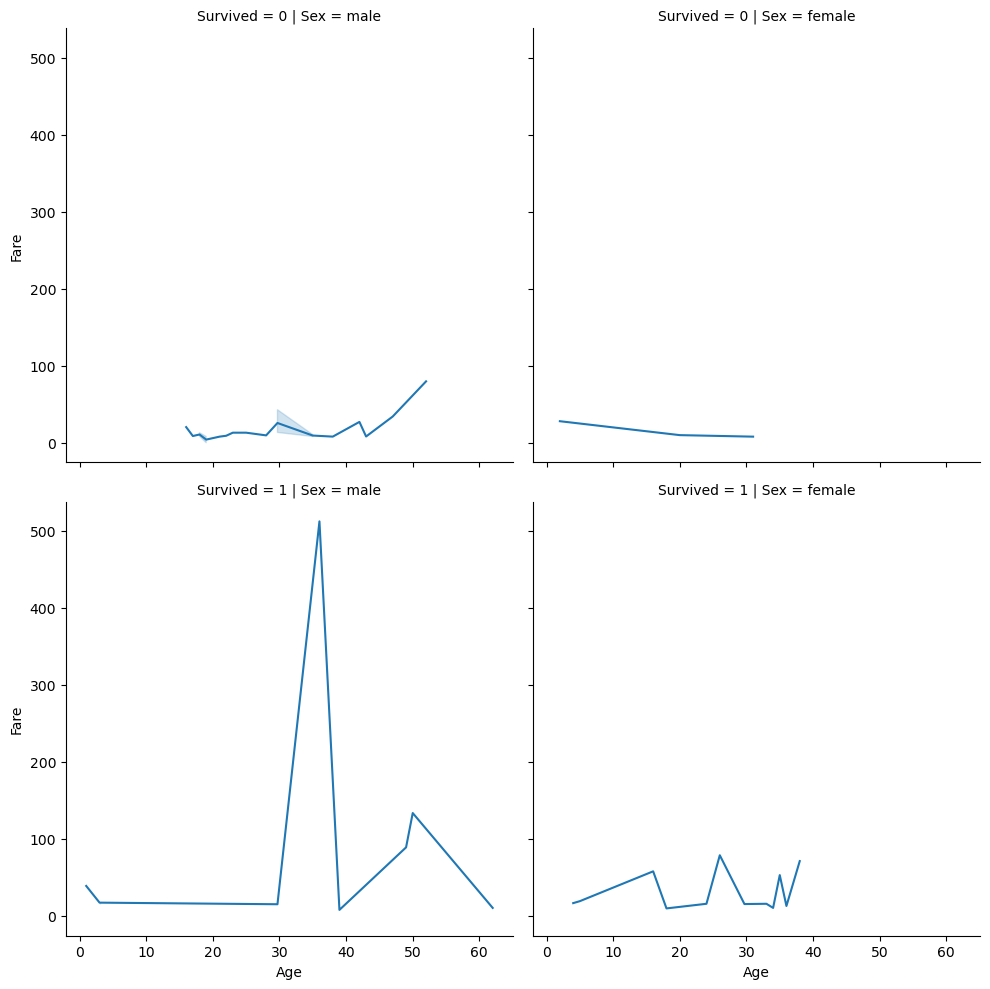

In [83]:
sns.relplot(data=df,x='Age',y='Fare',kind='line',col='Sex',row='Survived')

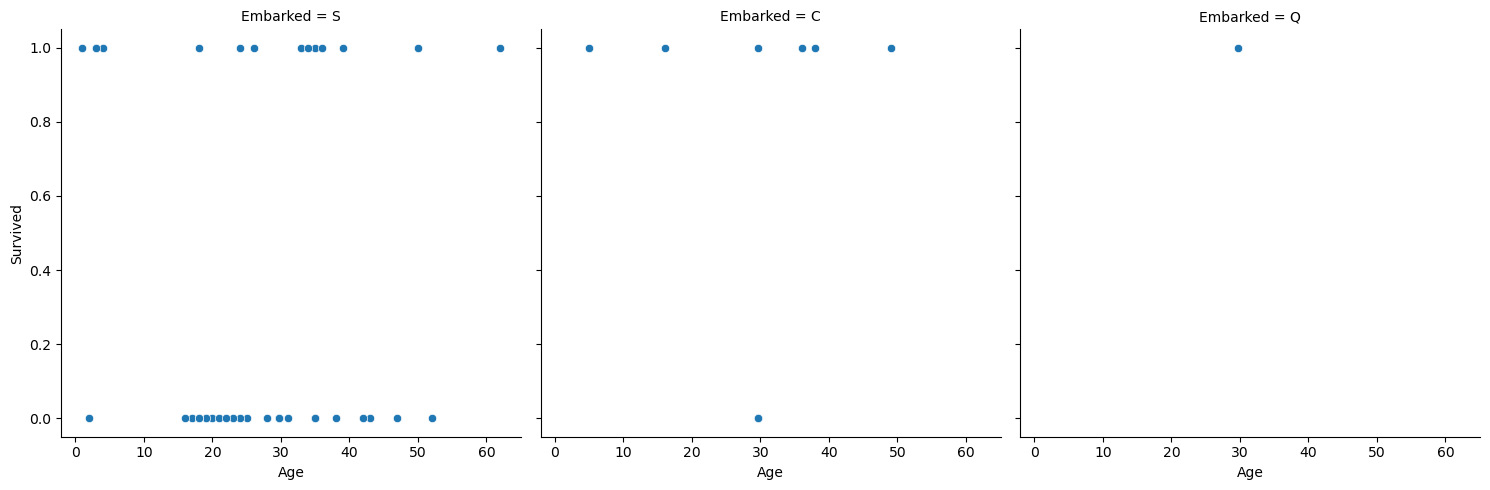

In [103]:
sns.relplot(data=df,x='Age',y='Survived',kind='scatter',col='Embarked',col_wrap=3)

<Axes: xlabel='Survived', ylabel='Age'>

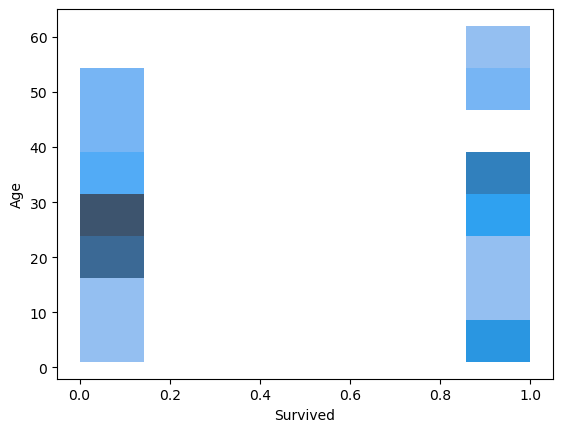

In [109]:
sns.histplot(data=df,x='Survived',y='Age')

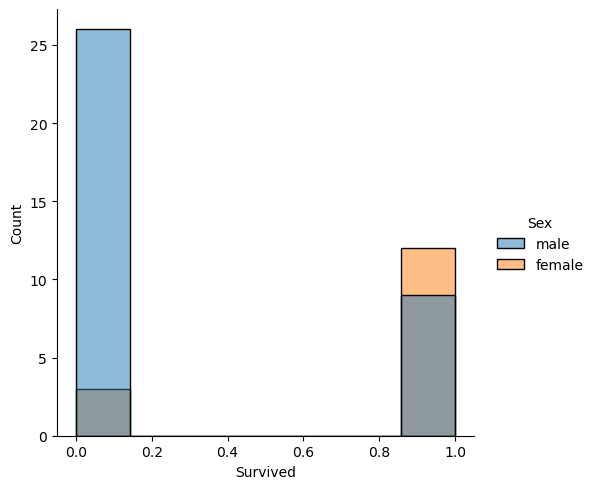

In [113]:
sns.displot(data=df,x='Survived',kind='hist',hue='Sex')

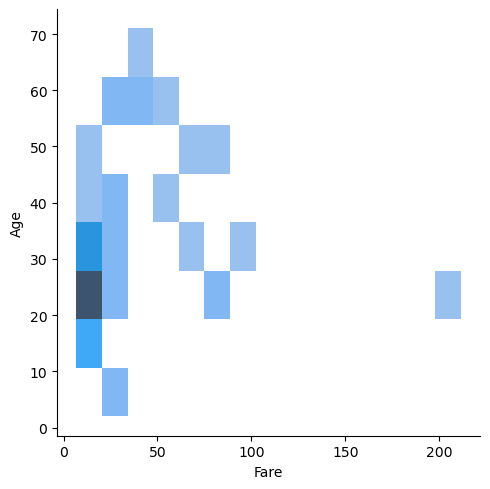

In [136]:
sns.displot(data=df,x='Fare',y='Age',kind='hist')

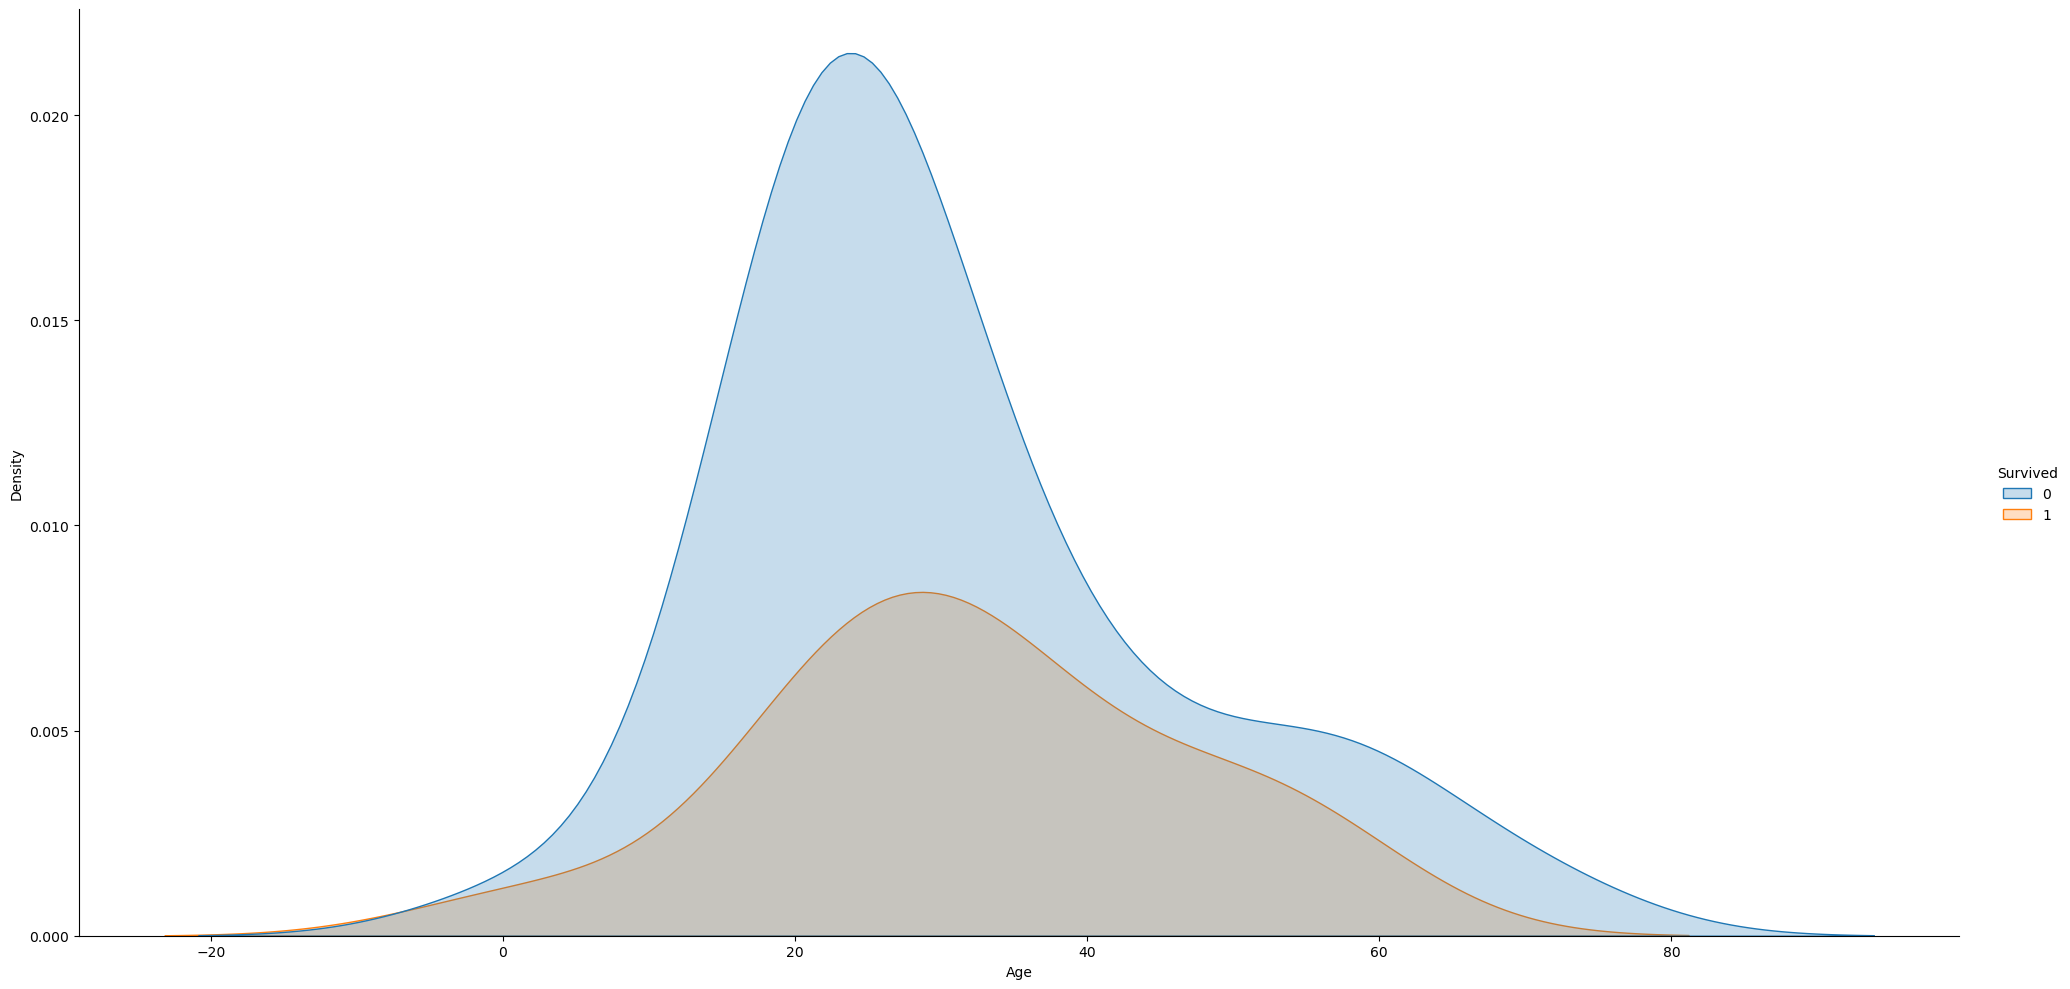

In [150]:
sns.displot(data=df,x='Age',kind='kde',hue='Survived',fill='True',height=10,aspect=2)

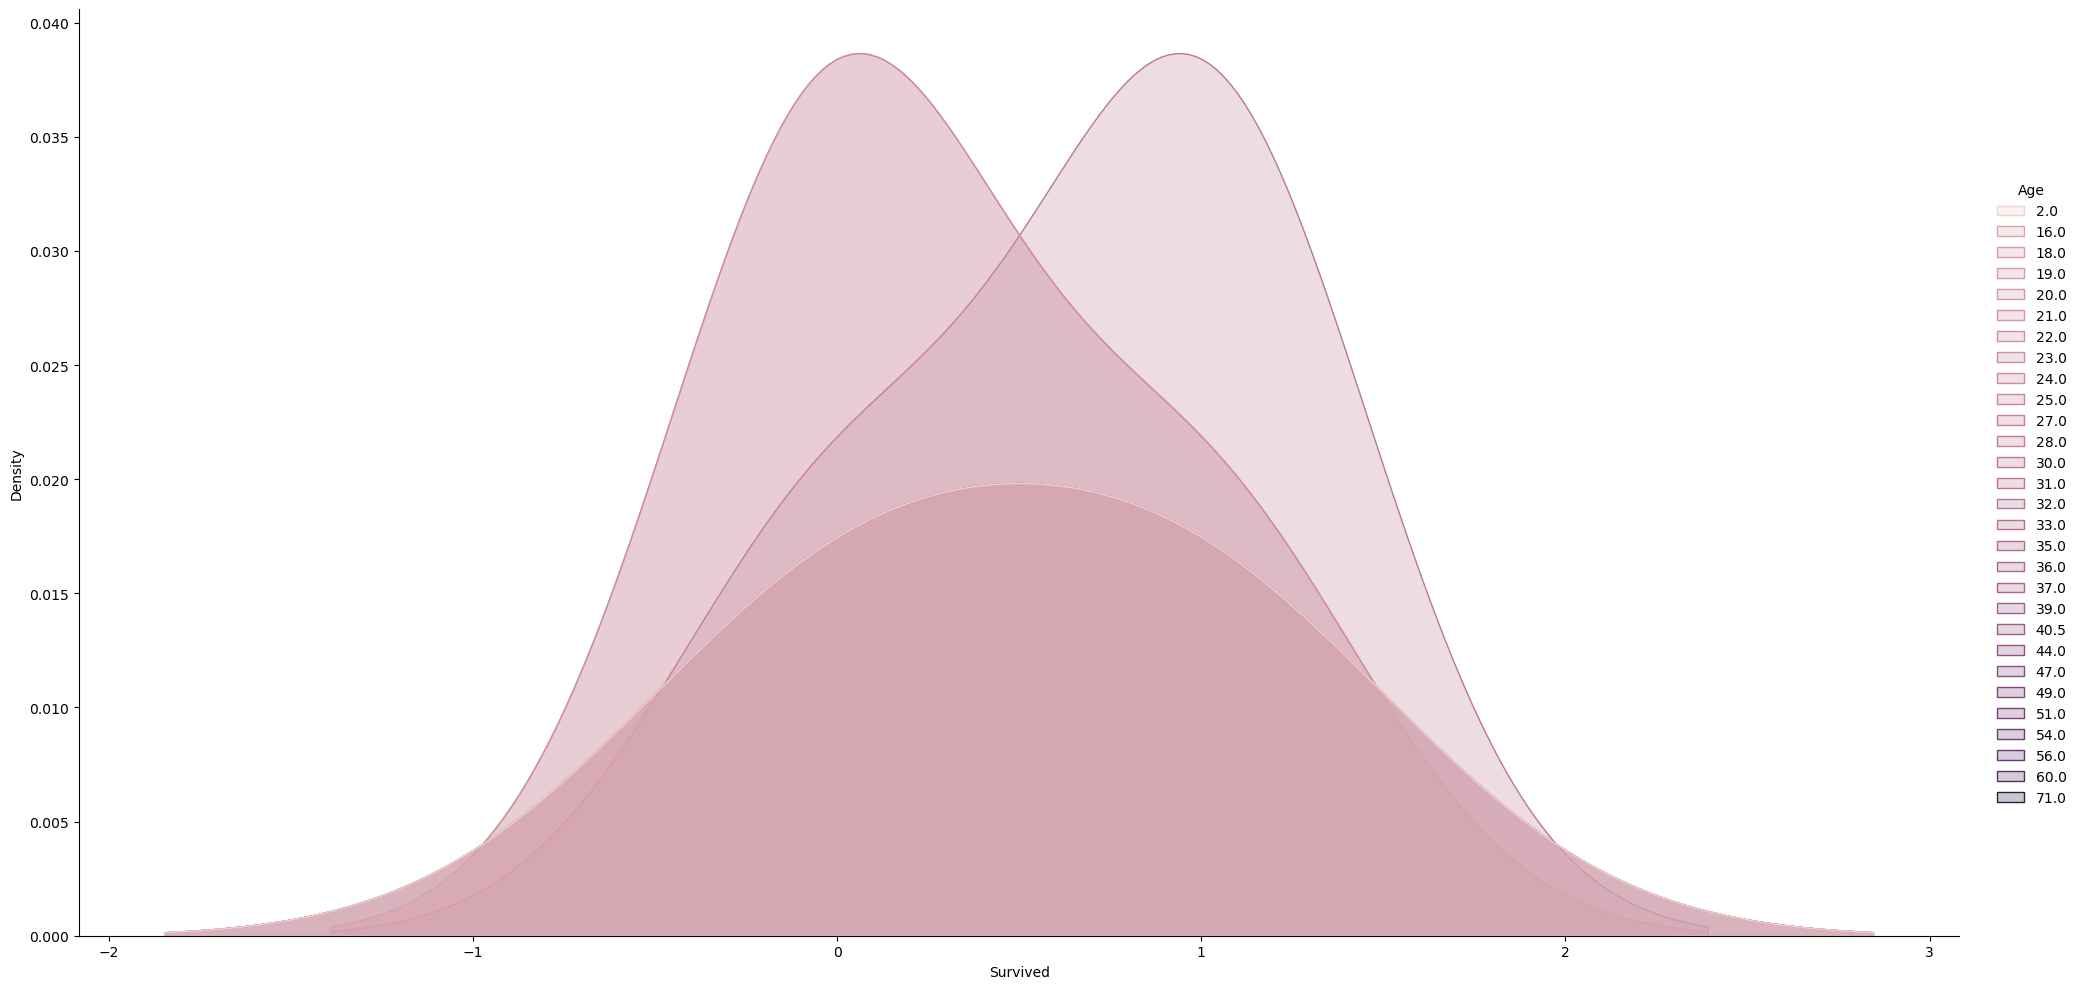

In [156]:
sns.displot(data=df,x='Survived',kind='kde',hue='Age',fill='True',height=10,aspect=2)

<Axes: xlabel='Age', ylabel='Survived'>

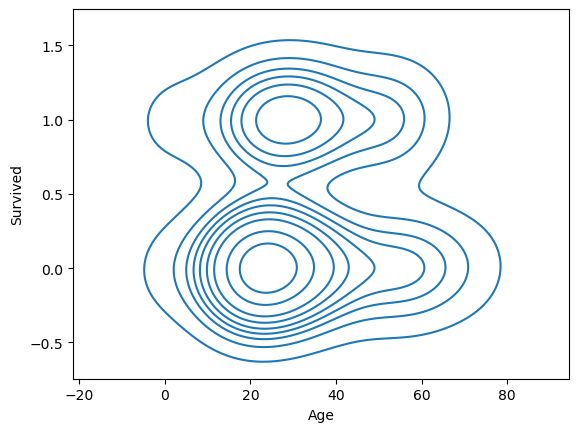

In [158]:
sns.kdeplot(data=df,x='Age',y='Survived')